<div align="center">
<h1 style="color:#1565c0; font-size:2.8em; font-weight:bold; margin-bottom:0.2em; margin-top:0.5em;">Практична робота №4</h1>
<h3 style="color:#1976d2; margin-top:0; font-weight:normal;">Кластеризацiя засобами
бiблiотеки Scikit-Learn Python <b>Scikit-Learn Python</b></h3>
<br>
<br>
<b>Варіант 12</b><br>
<b>Автори:</b><br>
Плахтій Злата, КА-32<br>
Пастушенко Максим, КА-33<br>
Романов Фелікс, КА-33
</div>


<b>Хід роботи:</b>
1.  Представити початковi данi графiчно.
2.  Побудувати модель кластеризацiї згiдно з варiантом.
3.  Виконати кластеризацiю даних на основi моделi.
4.  Представити розбиття на кластери графiчно (наприклад, рiзними кольорами).
5.  Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок до 100 000 i бiльше).
6.  Побудувати кiлька альтернативних моделей:
    * шляхом змiни значень параметрiв основної моделi;
    * використати рiзнi функцiї вiдстанi (де це можливо);
    * задати рiзнi значення кiлькостi кластерiв (де це параметр).
7.  Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї з `sklearn.metrics` (тiльки метрики згiдно з варiантом):
    * Estimated Number of Clusters
    * Adjusted Rand Index
    * Adjusted Mutual Information
    * Homogeneity
    * Completeness
    * V-measure
    * Silhouette Coefficient
    * Calinski-Harabasz Index
    * Davies-Bouldin index
    * Contingency Matrix
8.  Виконати аналiз результатiв одним з неформальних методiв (тiльки методом згiдно з варiантом):
    * чи є розбиття стабiльним на пiдвибiрках даних?
    * чи є розбиття стабiльним пiсля видалення окремих об’єктiв?
    * чи є розбиття стабiльним пiсля змiни порядку об’єктiв?
    * чи iснує взаємозв’язок мiж результатами i змiнними, якi не враховувалися?
    * чи можна iнтерпретувати результати?
9.  Виконати пункти 1-8 для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей та про швидкодiю методу.
11. Оцiнити результати (на основi метрик та неформальних методiв). Спробувати пiдiбрати найкращу модель для кожного набору даних
## Завдання (Варіант 12)
* **Алгоритм:** `Birch`
* **Метрики якостi:**
    * Estimated number of clusters
    * Adjusted Rand Index
    * Adjusted Mutual Information
    * Silhouette Coefficient
* **Неформальний метод:**
    * Чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi об’єктiв?
* **Початковi данi:**
    1.  `sklearn.datasets.make_moons`
    2.  `sklearn.datasets.load_iris`

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time

# Імпорти для sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.datasets import make_moons # Потрібно для тесту швидкодії
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    silhouette_score
)

print("=== Початок аналізу 'moons_dataset.csv' ===")

# --- Завантаження моїх даних ---
# Вказую шлях до моєї папки 'data'
moons_filepath = Path("data/moons_dataset.csv") 
moons_df = pd.read_csv(moons_filepath)

# --- Розділення на ознаки та цільову змінну ---
# X - мої ознаки, y_true - справжні мітки
X = moons_df.drop('target', axis=1).values
y_true = moons_df['target'].values
feature_names = moons_df.drop('target', axis=1).columns.tolist()

print("\n=== Попередній аналіз даних ===")
print(f"Розмірність: {X.shape}")
print(f"Назви ознак: {feature_names}")
print(f"\nСтатистичний опис:\n{moons_df.describe()}")
print(f"\nКількість зразків у кожному класі:\n{moons_df['target'].value_counts().sort_index()}")

# Створюю порожні змінні, щоб зберігати результати
# Ці змінні будуть заповнюватися у наступних етапах
X_scaled = None
labels_base = None
results = []
metrics_df = None
stability_results = []

print(f"\n--- Дані з '{moons_filepath}' успішно завантажено ---")

=== Початок аналізу 'moons_dataset.csv' ===

=== Попередній аналіз даних ===
Розмірність: (1000, 2)
Назви ознак: ['feature_1', 'feature_2']

Статистичний опис:
         feature_1    feature_2      target
count  1000.000000  1000.000000  1000.00000
mean      0.499253     0.248660     0.50000
std       0.868189     0.496278     0.50025
min      -1.106733    -0.619895     0.00000
25%      -0.032222    -0.216263     0.00000
50%       0.517722     0.238382     0.50000
75%       1.035188     0.699237     1.00000
max       2.122676     1.080074     1.00000

Кількість зразків у кожному класі:
target
0    500
1    500
Name: count, dtype: int64

--- Дані з 'data\moons_dataset.csv' успішно завантажено ---



=== Етап 1: Візуалізація початкових даних ===


<Figure size 800x600 with 0 Axes>

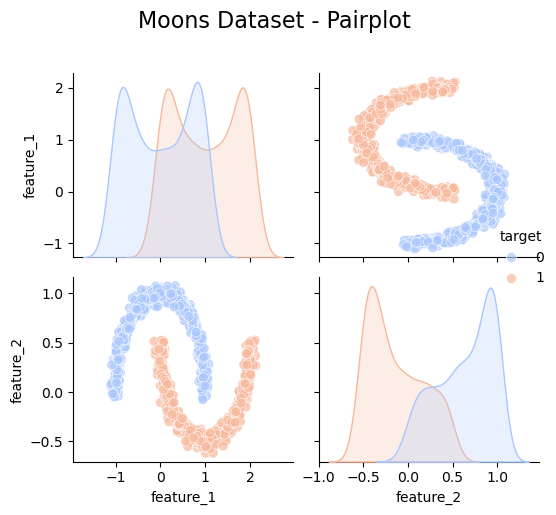

C:\Users\Felix\AppData\Local\Temp\ipykernel_13268\1080721908.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([moons_df[moons_df['target'] == i][feature] for i in range(2)],
C:\Users\Felix\AppData\Local\Temp\ipykernel_13268\1080721908.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([moons_df[moons_df['target'] == i][feature] for i in range(2)],


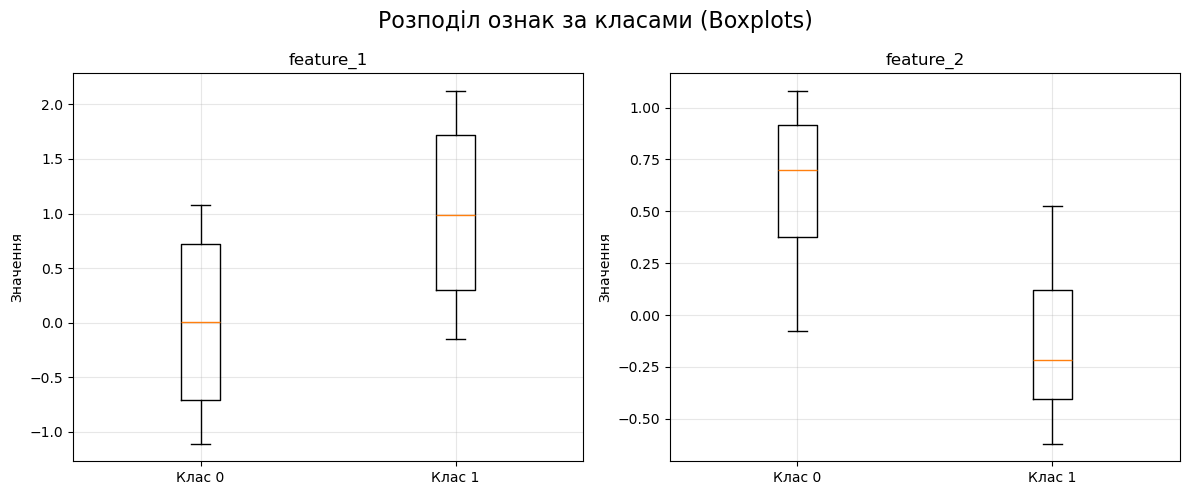


(3D візуалізація пропущена, оскільки дані 2-вимірні)


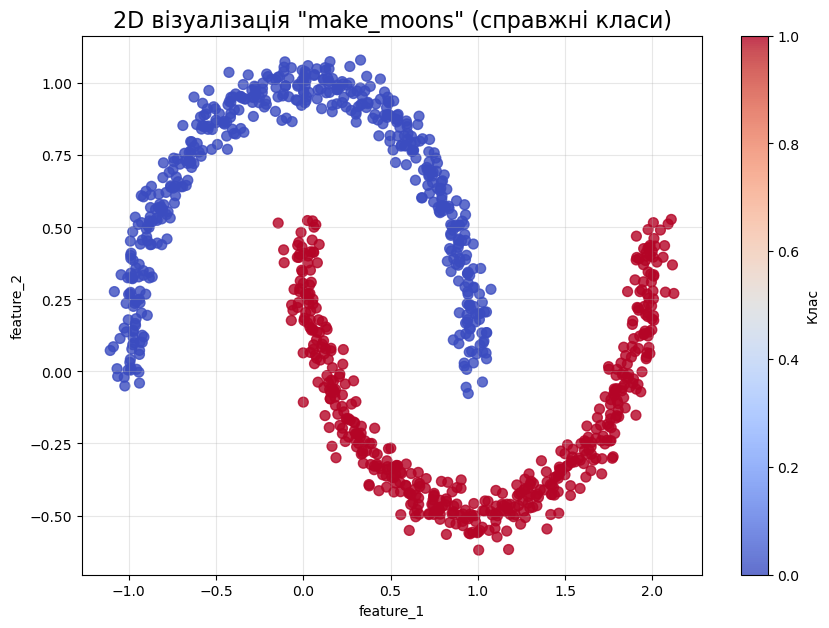

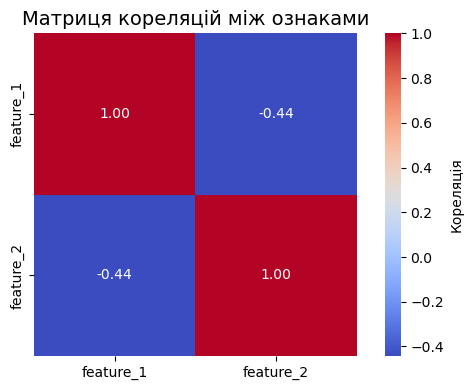

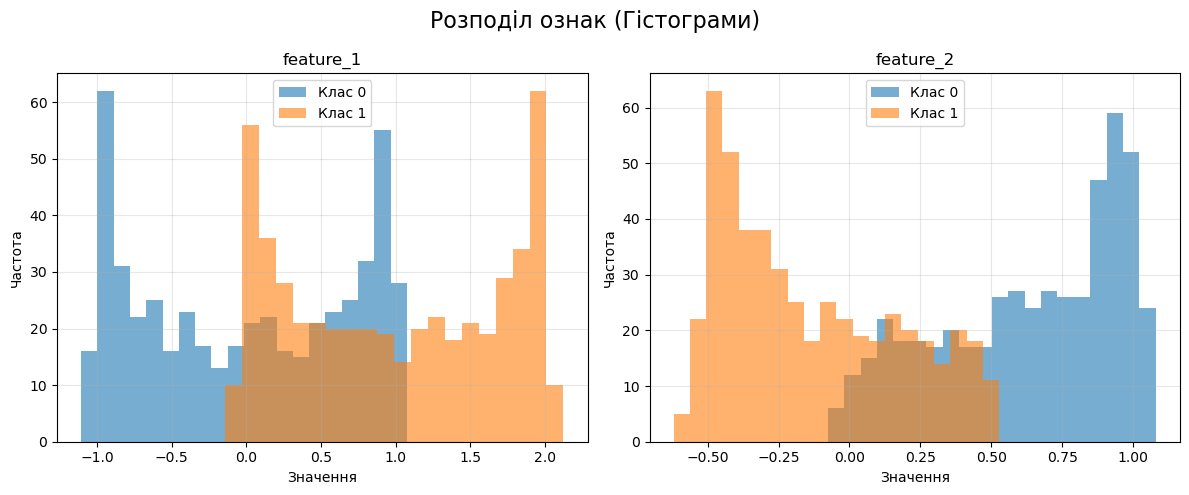


=== Етап 1 завершено ===


In [13]:
print("\n=== Етап 1: Візуалізація початкових даних ===")

# 1. Pairplot
# Оскільки ознак лише 2, pairplot покаже все головне
plt.figure(figsize=(8, 6))
sns.pairplot(moons_df, hue='target', palette='coolwarm', diag_kind='kde',
             plot_kws={'alpha': 0.7, 's': 50})
plt.suptitle('Moons Dataset - Pairplot', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 2. Boxplots для кожної ознаки
# Роблю 1x2 графік, бо маю 2 ознаки
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.ravel()

for idx, feature in enumerate(feature_names):
    axes[idx].boxplot([moons_df[moons_df['target'] == i][feature] for i in range(2)],
                      labels=['Клас 0', 'Клас 1']) # 2 кластери
    axes[idx].set_title(feature)
    axes[idx].set_ylabel('Значення')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Розподіл ознак за класами (Boxplots)', fontsize=16)
plt.tight_layout()
plt.show()

# 3. 2D візуалізація
# 3D-графік тут не потрібен. 2D - це найкращий спосіб
# побачити структуру "місяців".
print("\n(3D візуалізація пропущена, оскільки дані 2-вимірні)")
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='coolwarm', s=50, alpha=0.8)
plt.title('2D візуалізація "make_moons" (справжні класи)', fontsize=16)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.colorbar(label='Клас')
plt.grid(True, alpha=0.3)
plt.show()

# 4. Heatmap кореляцій між ознаками
# Матриця буде 2x2
plt.figure(figsize=(6, 4))
correlation_matrix = moons_df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, cbar_kws={'label': 'Кореляція'})
plt.title('Матриця кореляцій між ознаками', fontsize=14)
plt.tight_layout()
plt.show()

# 5. Розподіл кожної ознаки (гістограми)
# Також 1x2 графік
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.ravel()

for idx, feature in enumerate(feature_names):
    for class_label in range(2): # 2 кластери
        class_name = f'Клас {class_label}'
        axes[idx].hist(moons_df[moons_df['target'] == class_label][feature],
                       alpha=0.6, label=class_name, bins=20)
    axes[idx].set_xlabel('Значення')
    axes[idx].set_ylabel('Частота')
    axes[idx].set_title(feature)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Розподіл ознак (Гістограми)', fontsize=16)
plt.tight_layout()
plt.show()

print("\n=== Етап 1 завершено ===")


=== Етап 2: Підготовка даних (масштабування) ===

До масштабування:
Mean: [0.49925327 0.2486601 ]
Std:  [0.86775501 0.49603008]

Після масштабування:
Mean: [-9.23705556e-17  7.10542736e-18]
Std:  [1. 1.]


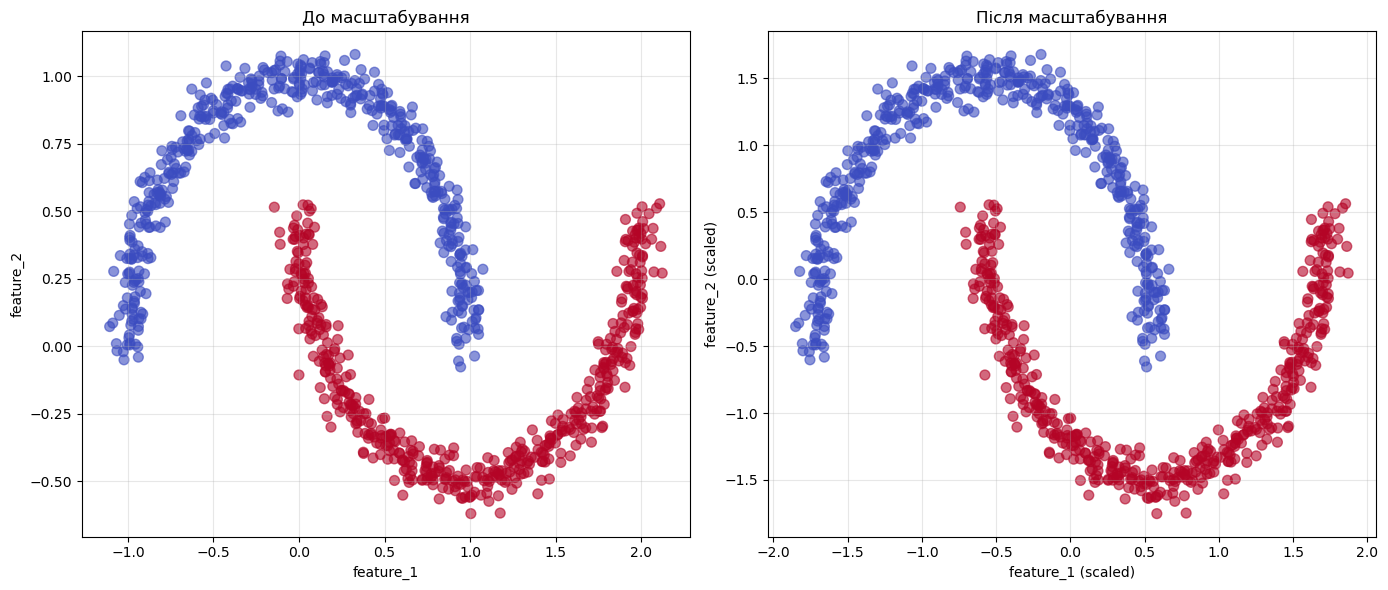


=== Дані підготовлено. X_scaled готовий для кластеризації ===


In [14]:
print("\n=== Етап 2: Підготовка даних (масштабування) ===")

# Створюю та навчаю StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Порівнюю до/після масштабування
print("\nДо масштабування:")
print(f"Mean: {X.mean(axis=0)}")
print(f"Std:  {X.std(axis=0)}")

print("\nПісля масштабування:")
print(f"Mean: {X_scaled.mean(axis=0)}")
print(f"Std:  {X_scaled.std(axis=0)}")

# Візуалізація порівняння (1x2 графік: До vs Після)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# До масштабування
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='coolwarm', alpha=0.6, s=50)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title('До масштабування')
axes[0].grid(True, alpha=0.3)

# Після масштабування
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='coolwarm', alpha=0.6, s=50)
axes[1].set_xlabel(f'{feature_names[0]} (scaled)')
axes[1].set_ylabel(f'{feature_names[1]} (scaled)')
axes[1].set_title('Після масштабування')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Дані підготовлено. X_scaled готовий для кластеризації ===")


=== Етап 3: Побудова та виконання базової моделі BIRCH ===

Час кластеризації (для 1000 зразків): 0.0218 секунд
Кількість знайдених кластерів: 2
Розподіл по кластерах: [589 411]


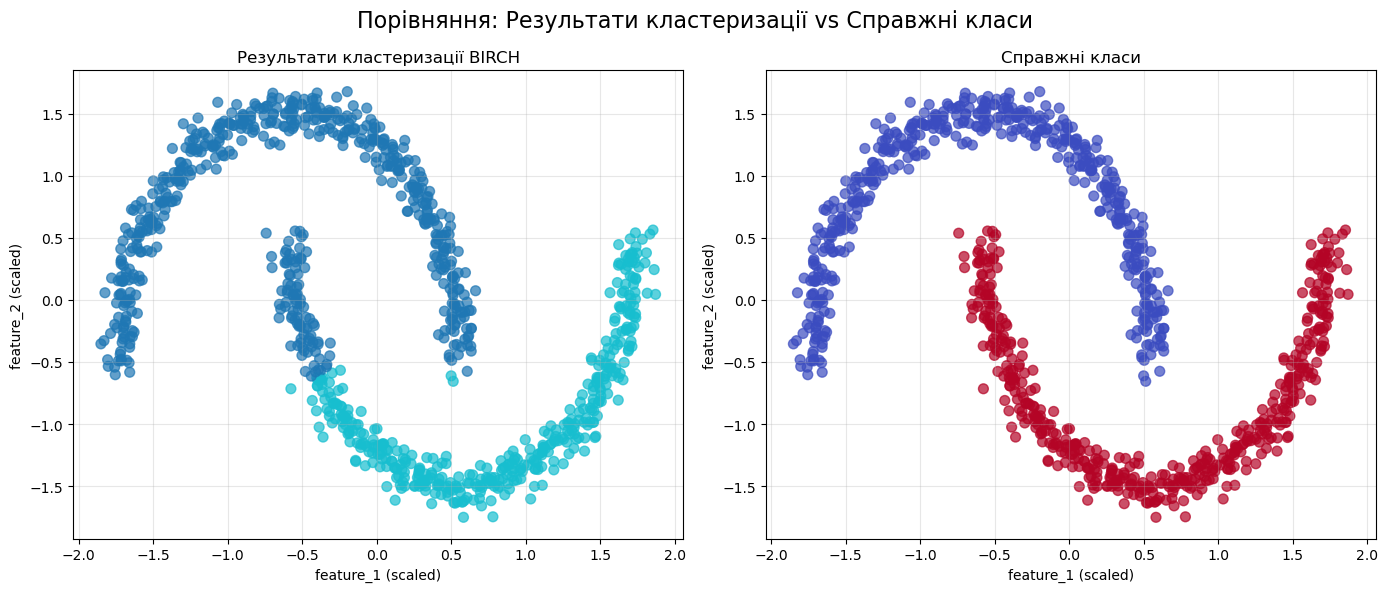


=== Базова модель BIRCH побудована та візуалізована ===


In [15]:
print("\n=== Етап 3: Побудова та виконання базової моделі BIRCH ===")

# Побудова базової моделі
# Для 'moons' очікувана кількість кластерів = 2
base_model = Birch(
    n_clusters=2,           
    threshold=0.5,          # Стандартний поріг
    branching_factor=50     # Стандартний фактор
)

# Виконання кластеризації з вимірюванням часу
start_time = time.time()
labels_base = base_model.fit_predict(X_scaled) # Використовую X_scaled
clustering_time = time.time() - start_time

print(f"\nЧас кластеризації (для {len(X_scaled)} зразків): {clustering_time:.4f} секунд")
print(f"Кількість знайдених кластерів: {len(np.unique(labels_base))}")
print(f"Розподіл по кластерах: {np.bincount(labels_base)}")

# Візуалізація результатів кластеризації
# 1x2 графік: Результат кластеризації vs Справжні класи
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Перший графік - мої результати
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_base, cmap='tab10', alpha=0.7, s=50)
axes[0].set_xlabel(f'{feature_names[0]} (scaled)')
axes[0].set_ylabel(f'{feature_names[1]} (scaled)')
axes[0].set_title('Результати кластеризації BIRCH')
axes[0].grid(True, alpha=0.3)

# Другий графік - справжні класи для порівняння
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='coolwarm', alpha=0.7, s=50)
axes[1].set_xlabel(f'{feature_names[0]} (scaled)')
axes[1].set_ylabel(f'{feature_names[1]} (scaled)')
axes[1].set_title('Справжні класи')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Порівняння: Результати кластеризації vs Справжні класи', fontsize=16)
plt.tight_layout()
plt.show()

print("\n=== Базова модель BIRCH побудована та візуалізована ===")

Розподіл по кластерах: [589 411] Ось це найважливіше. Це означає, що Birch вирішив:
До Кластеру 0 належить 589 точок.
До Кластеру 1 належить 411 точок.
(Разом 589 + 411 = 1000 точок, що збігається з розміром мого датасету).

Мій початковий moons_dataset був ідеально збалансований: 500 точок в одному "місяці" і 500 в іншому (це було видно у виводі Етапу 0).

Результат [589 411] не дорівнює [500, 500].

Це перше числове підтвердження того, що мої графіки з Етапу 3 показують правду: Birch помилився і "відрізав" кластери нерівно. Він не зміг впоратися з формою "місяців" і просто провів лінію, через що до першого кластера потрапило на 89 точок більше, а до другого — на 89 менше, ніж мало бути.


=== Етап 4: Оцінка швидкодії на великих наборах даних ===

Тестування швидкодії:
n=    150: 0.0041 сек
n=   1000: 0.0184 сек
n=  10000: 0.1374 сек
n=  50000: 0.6197 сек
n= 100000: 1.2311 сек
n= 500000: 6.0569 сек
n=1000000: 12.5442 сек


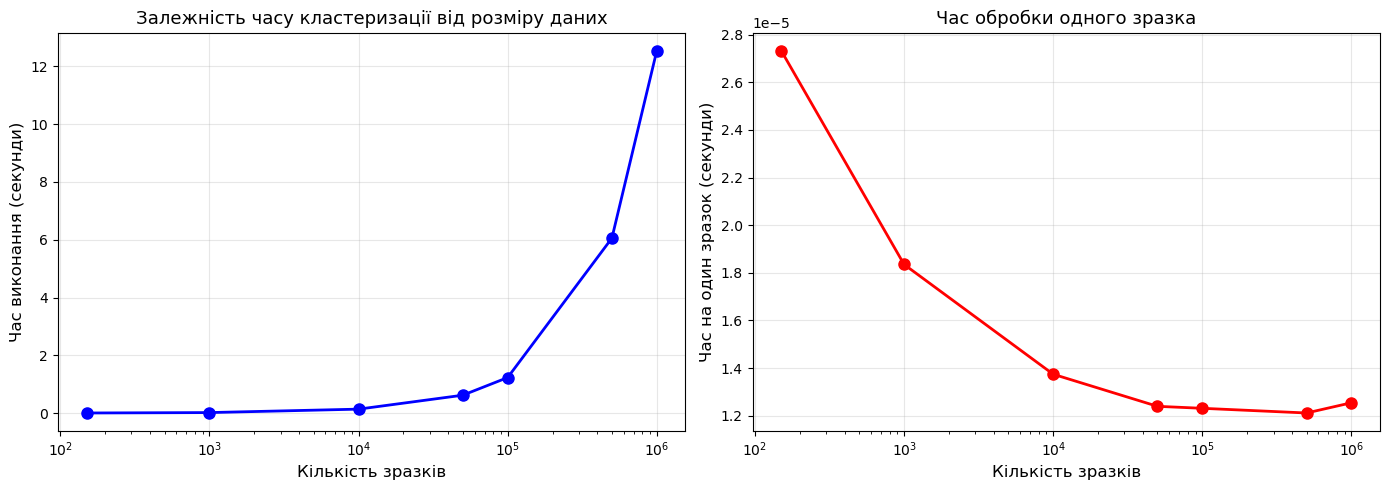


=== Аналіз складності ===
Збільшення даних у 6667 разів
Збільшення часу у 3060.22 разів
Висновок: Лінійна складність O(n)

=== Етап 4 завершено ===


In [11]:
print("\n=== Етап 4: Оцінка швидкодії на великих наборах даних ===")

# Розміри датасетів для тестування
sizes = [150, 1000, 10000, 50000, 100000, 500000, 1000000]
times = []
temp_scaler = StandardScaler() # Тимчасовий scaler для цього тесту

print("\nТестування швидкодії:")
for size in sizes:
    # Генерую синтетичні дані 'make_moons'
    X_large, _ = make_moons(
        n_samples=size,
        noise=0.05,
        random_state=42
    )
    
    # Масштабую великі дані
    X_large_scaled = temp_scaler.fit_transform(X_large)
    
    # Використовую n_clusters=2
    model = Birch(n_clusters=2, threshold=0.5, branching_factor=50)
    start = time.time()
    model.fit(X_large_scaled)
    elapsed = time.time() - start
    times.append(elapsed)
    
    print(f"n={size:>7}: {elapsed:.4f} сек")

# Візуалізація результатів
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Графік залежності часу від розміру
axes[0].plot(sizes, times, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Кількість зразків', fontsize=12)
axes[0].set_ylabel('Час виконання (секунди)', fontsize=12)
axes[0].set_title('Залежність часу кластеризації від розміру даних', fontsize=13)
axes[0].grid(True, alpha=0.3)
axes[0].set_xscale('log')

# Графік для оцінки складності (час на один зразок)
time_per_sample = [t/s for t, s in zip(times, sizes)]
axes[1].plot(sizes, time_per_sample, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Кількість зразків', fontsize=12)
axes[1].set_ylabel('Час на один зразок (секунди)', fontsize=12)
axes[1].set_title('Час обробки одного зразка', fontsize=13)
axes[1].grid(True, alpha=0.3)
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

# Оцінка складності
print("\n=== Аналіз складності ===")
if len(times) > 1: # Перевірка, що тест виконався
    print(f"Збільшення даних у {sizes[-1]/sizes[0]:.0f} разів")
    print(f"Збільшення часу у {times[-1]/times[0]:.2f} разів")
    # Проста евристика для лінійності
    is_linear = (times[-1] / times[0]) < (sizes[-1] / sizes[0]) * 2
    print(f"Висновок: {'Лінійна складність O(n)' if is_linear else 'Нелінійна складність'}")
else:
    print("Тест швидкодії не дав достатньо даних для аналізу.")

print("\n=== Етап 4 завершено ===")


=== Етап 5: Побудова альтернативних моделей ===

1. Експерименти з threshold:
  threshold=0.1: 2 кластерів, час=0.0359с
  threshold=0.3: 2 кластерів, час=0.0147с
  threshold=0.5: 2 кластерів, час=0.0154с
  threshold=0.7: 2 кластерів, час=0.0147с
  threshold=1.0: 2 кластерів, час=0.0143с

2. Експерименти з branching_factor:
  branching_factor=20: 2 кластерів, час=0.0160с
  branching_factor=50: 2 кластерів, час=0.0135с
  branching_factor=100: 2 кластерів, час=0.0145с
  branching_factor=150: 2 кластерів, час=0.0157с

3. Експерименти з n_clusters:
  n_clusters=None: 8 кластерів, час=0.0154с
  n_clusters=2: 2 кластерів, час=0.0184с
  n_clusters=3: 3 кластерів, час=0.0193с
  n_clusters=4: 4 кластерів, час=0.0201с
  n_clusters=5: 5 кластерів, час=0.0209с

4. Комбінації параметрів:
  t=0.3, bf=100, n=2: 2 кластерів, час=0.0186с
  t=0.7, bf=100, n=2: 2 кластерів, час=0.0187с
  t=0.3, bf=20, n=3: 3 кластерів, час=0.0185с
  t=0.7, bf=20, n=4: 4 кластерів, час=0.0176с

=== Створено 18 альтернатив

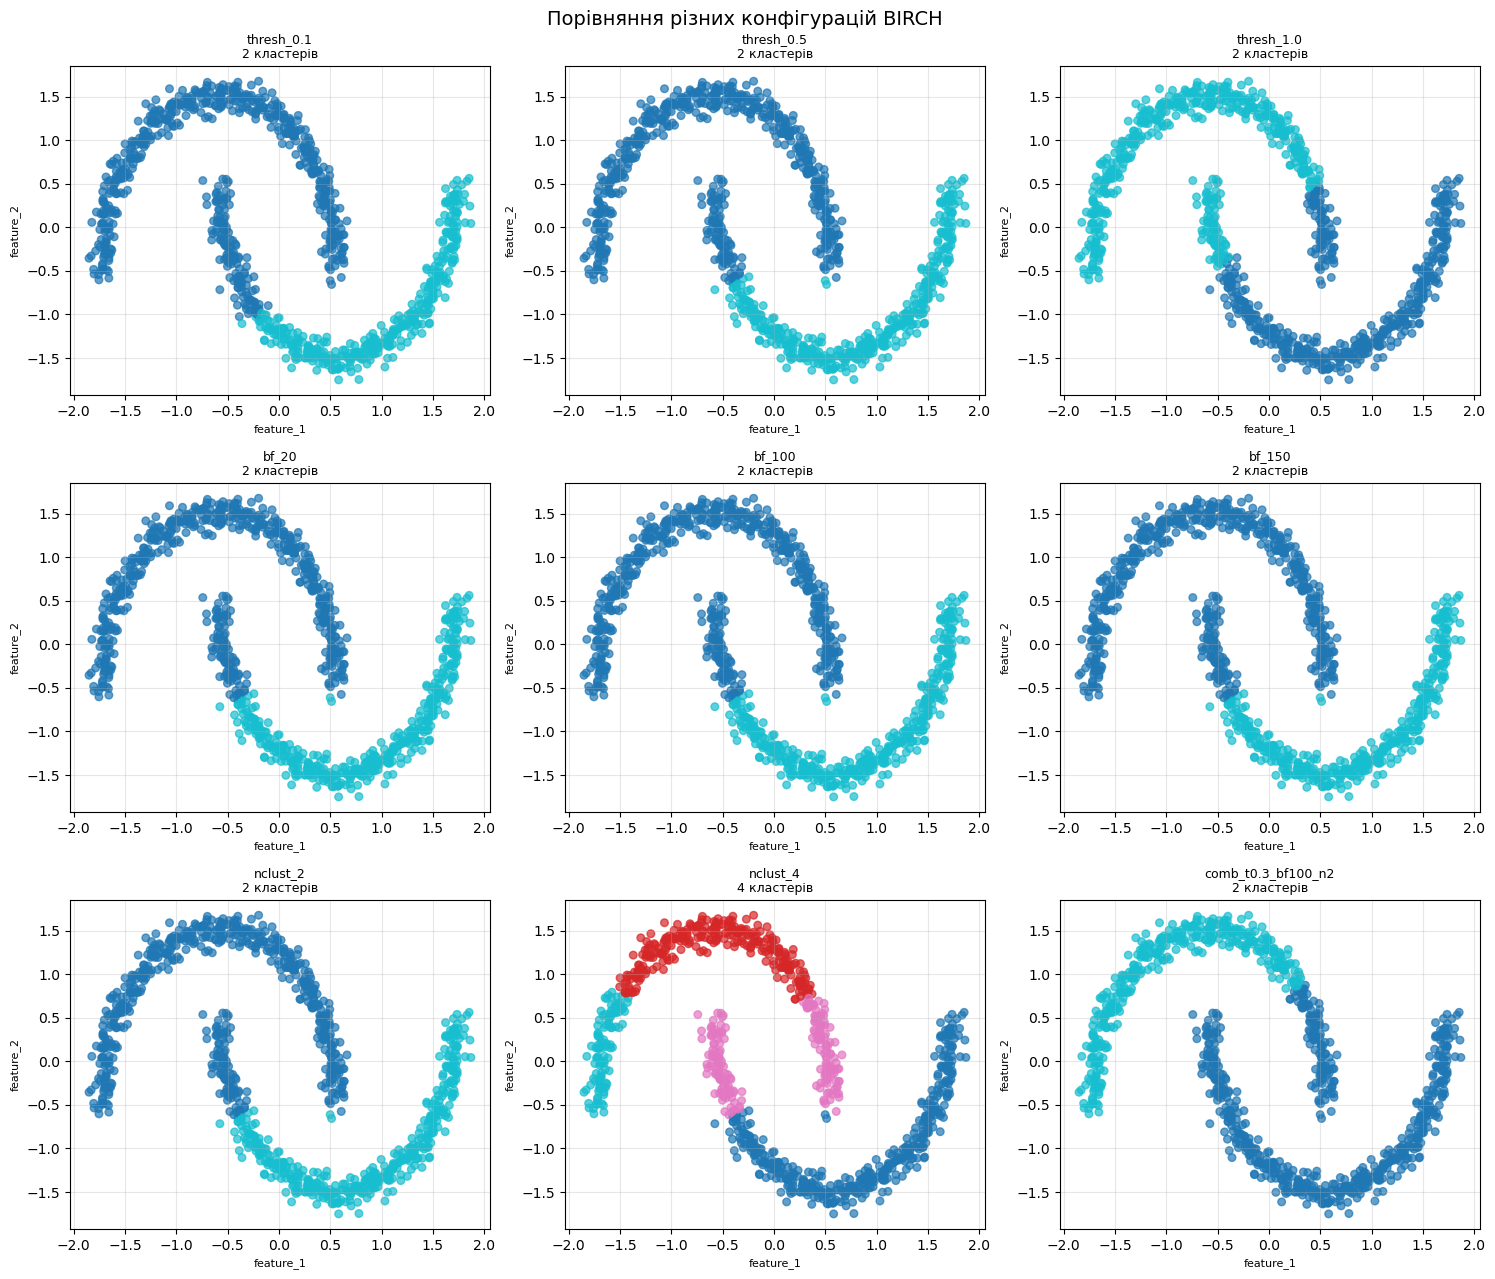


=== Етап 5 завершено ===


In [16]:
print("\n=== Етап 5: Побудова альтернативних моделей ===")

# Очищую список результатів, якщо запускаю повторно
results = []

# 1. Зміна threshold
print("\n1. Експерименти з threshold:")
thresholds = [0.1, 0.3, 0.5, 0.7, 1.0]
for thresh in thresholds:
    # База - n_clusters=2
    model = Birch(n_clusters=2, threshold=thresh, branching_factor=50)
    start = time.time()
    labels = model.fit_predict(X_scaled)
    exec_time = time.time() - start
    
    results.append({
        'model': f'thresh_{thresh}',
        'threshold': thresh,
        'branching_factor': 50,
        'n_clusters': 2,
        'labels': labels,
        'time': exec_time,
        'n_found_clusters': len(np.unique(labels))
    })
    print(f"  threshold={thresh}: {len(np.unique(labels))} кластерів, час={exec_time:.4f}с")

# 2. Зміна branching_factor
print("\n2. Експерименти з branching_factor:")
branching_factors = [20, 50, 100, 150]
for bf in branching_factors:
    # База - n_clusters=2
    model = Birch(n_clusters=2, threshold=0.5, branching_factor=bf)
    start = time.time()
    labels = model.fit_predict(X_scaled)
    exec_time = time.time() - start
    
    results.append({
        'model': f'bf_{bf}',
        'threshold': 0.5,
        'branching_factor': bf,
        'n_clusters': 2,
        'labels': labels,
        'time': exec_time,
        'n_found_clusters': len(np.unique(labels))
    })
    print(f"  branching_factor={bf}: {len(np.unique(labels))} кластерів, час={exec_time:.4f}с")

# 3. Зміна кількості кластерів
print("\n3. Експерименти з n_clusters:")
n_clusters_list = [None, 2, 3, 4, 5]
for n_clust in n_clusters_list:
    model = Birch(n_clusters=n_clust, threshold=0.5, branching_factor=50)
    start = time.time()
    labels = model.fit_predict(X_scaled)
    exec_time = time.time() - start
    
    results.append({
        'model': f'nclust_{n_clust}',
        'threshold': 0.5,
        'branching_factor': 50,
        'n_clusters': n_clust if n_clust else 'None',
        'labels': labels,
        'time': exec_time,
        'n_found_clusters': len(np.unique(labels))
    })
    print(f"  n_clusters={n_clust}: {len(np.unique(labels))} кластерів, час={exec_time:.4f}с")

# 4. Комбінації параметрів
print("\n4. Комбінації параметрів:")
combinations = [
    (0.3, 100, 2),
    (0.7, 100, 2),
    (0.3, 20, 3), # Тестую з 3 кластерами
    (0.7, 20, 4), # Тестую з 4 кластерами
]

for thresh, bf, n_clust in combinations:
    model = Birch(n_clusters=n_clust, threshold=thresh, branching_factor=bf)
    start = time.time()
    labels = model.fit_predict(X_scaled)
    exec_time = time.time() - start
    
    results.append({
        'model': f'comb_t{thresh}_bf{bf}_n{n_clust}',
        'threshold': thresh,
        'branching_factor': bf,
        'n_clusters': n_clust,
        'labels': labels,
        'time': exec_time,
        'n_found_clusters': len(np.unique(labels))
    })
    print(f"  t={thresh}, bf={bf}, n={n_clust}: {len(np.unique(labels))} кластерів, час={exec_time:.4f}с")

print(f"\n=== Створено {len(results)} альтернативних моделей ===")

# Візуалізація деяких моделей
fig, axes = plt.subplots(3, 3, figsize=(15, 13))
axes = axes.ravel()

# Вибираю 9 моделей для показу
models_to_show = [0, 2, 4, 5, 7, 8, 10, 12, 14] 
if len(results) >= 15: # Перевірка, що індекси існують
    for idx, model_idx in enumerate(models_to_show):
        res = results[model_idx]
        axes[idx].scatter(X_scaled[:, 0], X_scaled[:, 1],
                          c=res['labels'], cmap='tab10', alpha=0.7, s=30)
        axes[idx].set_title(f"{res['model']}\n{res['n_found_clusters']} кластерів",
                            fontsize=9)
        axes[idx].set_xlabel(feature_names[0], fontsize=8)
        axes[idx].set_ylabel(feature_names[1], fontsize=8)
        axes[idx].grid(True, alpha=0.3)
else:
    print("Недостатньо моделей для візуалізації (потрібно > 14).")

plt.suptitle('Порівняння різних конфігурацій BIRCH', fontsize=14)
plt.tight_layout()
plt.show()

print("\n=== Етап 5 завершено ===")


=== Етап 6: Розрахунок метрик якості ===

=== Таблиця метрик для всіх моделей ===
            Модель  Threshold  Branching Factor n_clusters (param)  Estimated Clusters      ARI      AMI  Silhouette  Час (с)
        thresh_0.1        0.1                50                  2                   2 0.535392 0.542148    0.451154 0.035891
        thresh_0.3        0.3                50                  2                   2 0.586365 0.578909    0.457994 0.014750
        thresh_0.5        0.5                50                  2                   2 0.662269 0.622879    0.461949 0.015400
        thresh_0.7        0.7                50                  2                   2 0.509345 0.523741    0.447136 0.014738
        thresh_1.0        1.0                50                  2                   2 0.470066 0.372466    0.496881 0.014257
             bf_20        0.5                20                  2                   2 0.662269 0.622879    0.461949 0.016024
             bf_50        0.5      

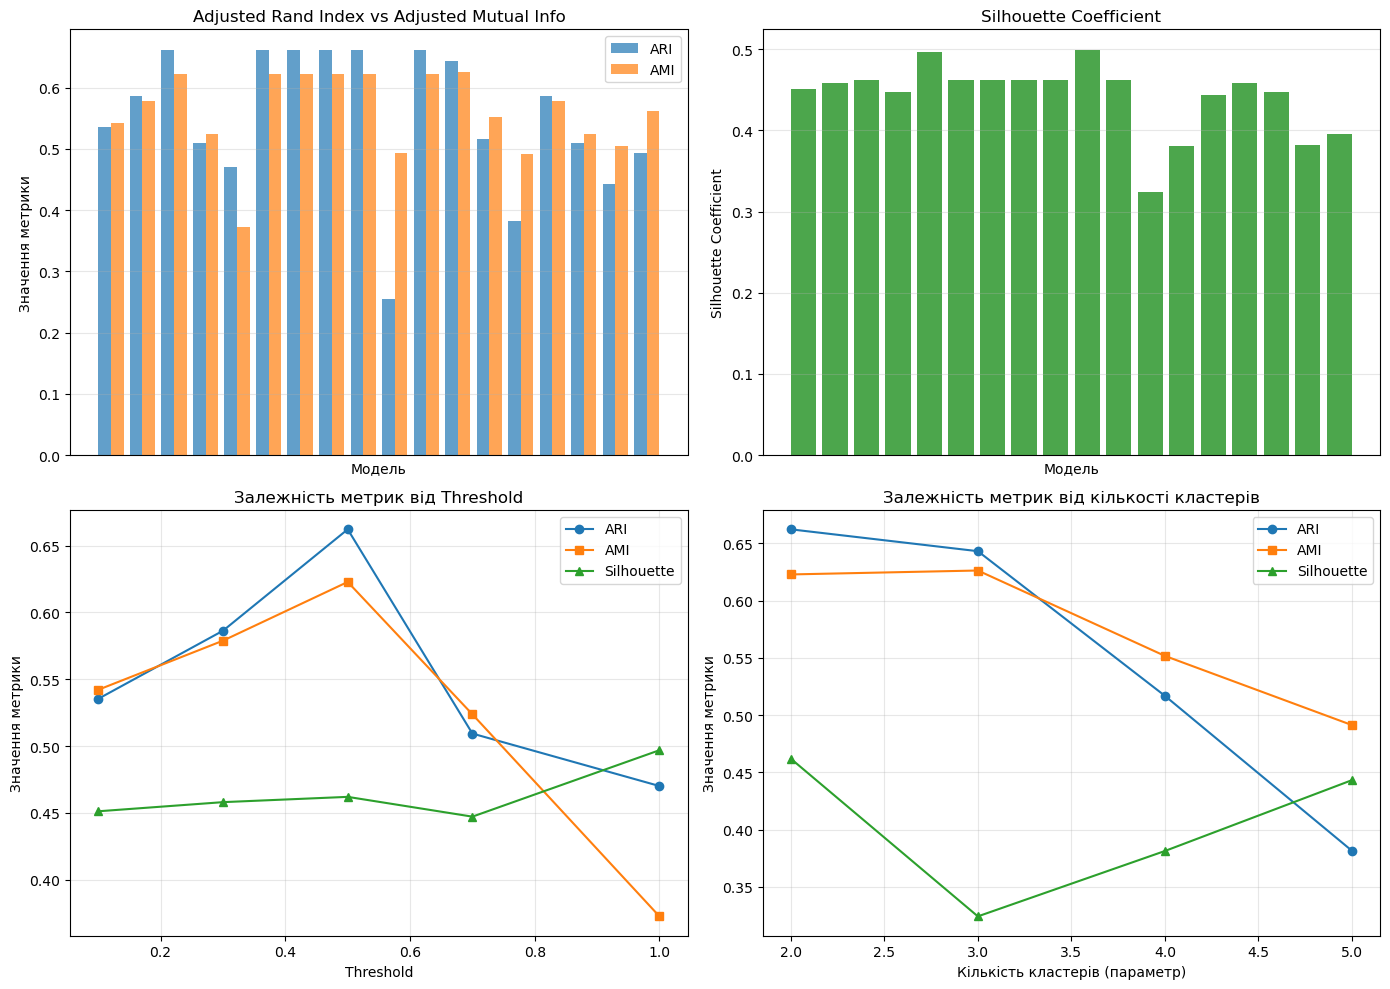


=== Етап 6 завершено ===


In [17]:
print("\n=== Етап 6: Розрахунок метрик якості ===")

if not results:
    print("ПОМИЛКА: Список 'results' порожній. Запустіть Етап 5 спочатку.")
else:
    # Розрахунок метрик для всіх моделей
    for res in results:
        labels = res['labels']
        
        # Метрики згідно варіанту:
        res['estimated_clusters'] = len(np.unique(labels))
        res['adjusted_rand_index'] = adjusted_rand_score(y_true, labels)
        res['adjusted_mutual_info'] = adjusted_mutual_info_score(y_true, labels)
        
        # Silhouette потребує мінімум 2 кластери
        if res['estimated_clusters'] > 1:
            res['silhouette'] = silhouette_score(X_scaled, labels)
        else:
            res['silhouette'] = np.nan

    # Створення DataFrame з результатами
    metrics_df = pd.DataFrame([{
        'Модель': r['model'],
        'Threshold': r['threshold'],
        'Branching Factor': r['branching_factor'],
        'n_clusters (param)': r['n_clusters'],
        'Estimated Clusters': r['estimated_clusters'],
        'ARI': r['adjusted_rand_index'],
        'AMI': r['adjusted_mutual_info'],
        'Silhouette': r['silhouette'],
        'Час (с)': r['time']
    } for r in results])

    print("\n=== Таблиця метрик для всіх моделей ===")
    print(metrics_df.to_string(index=False))

    # Пошук найкращої моделі
    print("\n=== Топ-5 моделей за метриками ===")
    print("\nЗа Adjusted Rand Index:")
    print(metrics_df.nlargest(5, 'ARI')[['Модель', 'ARI', 'AMI', 'Silhouette']])

    print("\nЗа Silhouette Coefficient:")
    print(metrics_df.nlargest(5, 'Silhouette')[['Модель', 'Silhouette', 'ARI', 'AMI']])

    # Візуалізація метрик
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Порівняння ARI vs AMI
    x_pos = np.arange(len(results))
    axes[0, 0].bar(x_pos, metrics_df['ARI'], alpha=0.7, label='ARI', width=0.4)
    axes[0, 0].bar(x_pos + 0.4, metrics_df['AMI'], alpha=0.7, label='AMI', width=0.4)
    axes[0, 0].set_xlabel('Модель')
    axes[0, 0].set_ylabel('Значення метрики')
    axes[0, 0].set_title('Adjusted Rand Index vs Adjusted Mutual Info')
    axes[0, 0].legend()
    axes[0, 0].set_xticks([])
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Silhouette Coefficient
    axes[0, 1].bar(x_pos, metrics_df['Silhouette'], alpha=0.7, color='green')
    axes[0, 1].set_xlabel('Модель')
    axes[0, 1].set_ylabel('Silhouette Coefficient')
    axes[0, 1].set_title('Silhouette Coefficient')
    axes[0, 1].set_xticks([])
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Залежність метрик від threshold
    thresh_models = metrics_df[metrics_df['Модель'].str.contains('thresh_')]
    if not thresh_models.empty:
        axes[1, 0].plot(thresh_models['Threshold'], thresh_models['ARI'], 'o-', label='ARI')
        axes[1, 0].plot(thresh_models['Threshold'], thresh_models['AMI'], 's-', label='AMI')
        axes[1, 0].plot(thresh_models['Threshold'], thresh_models['Silhouette'], '^-', label='Silhouette')
        axes[1, 0].set_xlabel('Threshold')
        axes[1, 0].set_ylabel('Значення метрики')
        axes[1, 0].set_title('Залежність метрик від Threshold')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    # 4. Залежність метрик від кількості кластерів
    nclust_models = metrics_df[metrics_df['Модель'].str.contains('nclust_')]
    if not nclust_models.empty:
        nclust_values = [2, 3, 4, 5]
        nclust_filtered = nclust_models[nclust_models['n_clusters (param)'].isin(nclust_values)]
        
        if not nclust_filtered.empty:
            axes[1, 1].plot(nclust_filtered['n_clusters (param)'], nclust_filtered['ARI'], 'o-', label='ARI')
            axes[1, 1].plot(nclust_filtered['n_clusters (param)'], nclust_filtered['AMI'], 's-', label='AMI')
            axes[1, 1].plot(nclust_filtered['n_clusters (param)'], nclust_filtered['Silhouette'], '^-', label='Silhouette')
            axes[1, 1].set_xlabel('Кількість кластерів (параметр)')
            axes[1, 1].set_ylabel('Значення метрики')
            axes[1, 1].set_title('Залежність метрик від кількості кластерів')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)
        else:
            axes[1, 1].set_title("Не знайдено моделей nclust_[2,3,4,5]")

    plt.tight_layout()
    plt.show()

print("\n=== Етап 6 завершено ===")


=== Етап 7: Аналіз стабільності (зміна порядку об'єктів) ===

Виконую 100 перестановок для кожної моделі...

Модель: thresh_0.1 (n=2)
  ARI: mean=0.5043, std=0.2568
  AMI: mean=0.5431, std=0.1952
  Ідентичних розбиттів: 0/100 (0.0%)

Модель: thresh_0.5 (n=2)
  ARI: mean=0.5894, std=0.2672
  AMI: mean=0.6062, std=0.2140
  Ідентичних розбиттів: 0/100 (0.0%)

Модель: thresh_1.0 (n=2)
  ARI: mean=0.8994, std=0.0929
  AMI: mean=0.8627, std=0.1025
  Ідентичних розбиттів: 1/100 (1.0%)

Модель: nclust_3 (t=0.5)
  ARI: mean=0.6660, std=0.1696
  AMI: mean=0.6981, std=0.1354
  Ідентичних розбиттів: 0/100 (0.0%)

Модель: nclust_4 (t=0.5)
  ARI: mean=0.6325, std=0.1557
  AMI: mean=0.7186, std=0.1013
  Ідентичних розбиттів: 0/100 (0.0%)

=== Таблиця стабільності ===
          Модель  ARI (mean)  ARI (std)  AMI (mean)  AMI (std)  Ідентичні (%)
thresh_0.1 (n=2)    0.504330   0.256834    0.543135   0.195169            0.0
thresh_0.5 (n=2)    0.589407   0.267180    0.606203   0.213999            0.0
th

C:\Users\Felix\AppData\Local\Temp\ipykernel_13268\452270930.py:107: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[5].boxplot([r['ari_scores'] for r in stability_results],


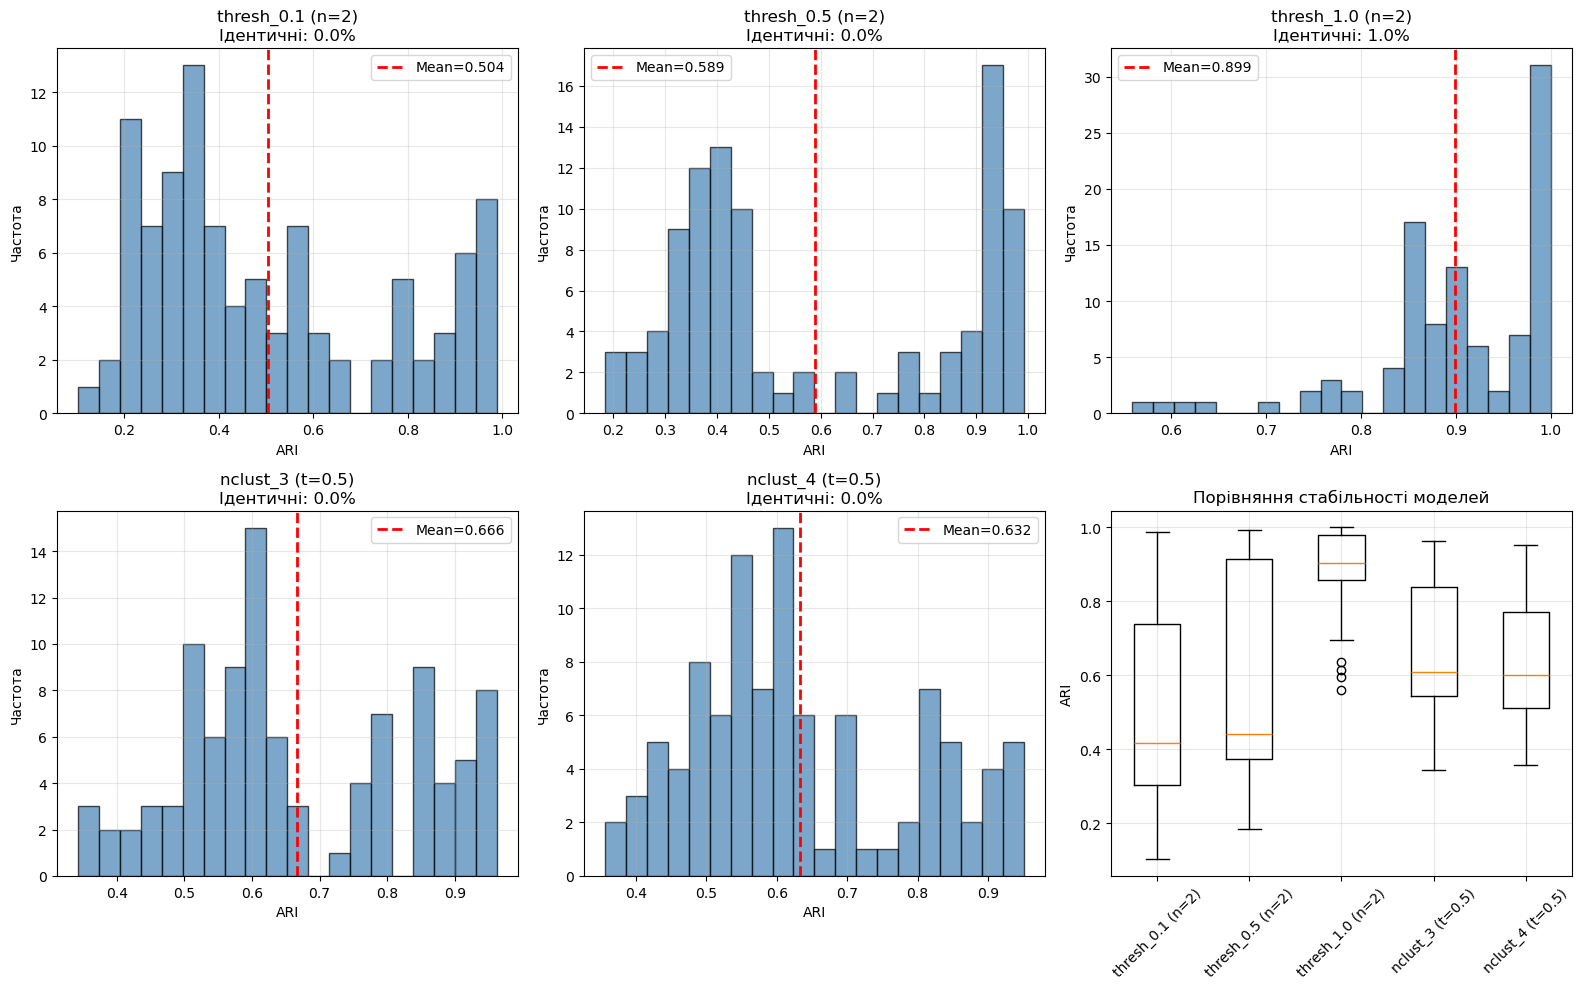


=== Етап 7 завершено ===

=== Увесь аналіз для 'moons_dataset.csv' виконано ===


In [18]:
print("\n=== Етап 7: Аналіз стабільності (зміна порядку об'єктів) ===")

# Вибираю моделі для тестування стабільності
models_to_test = [
    ('thresh_0.1 (n=2)', Birch(n_clusters=2, threshold=0.1, branching_factor=50)),
    ('thresh_0.5 (n=2)', Birch(n_clusters=2, threshold=0.5, branching_factor=50)), # Базова
    ('thresh_1.0 (n=2)', Birch(n_clusters=2, threshold=1.0, branching_factor=50)),
    ('nclust_3 (t=0.5)', Birch(n_clusters=3, threshold=0.5, branching_factor=50)),
    ('nclust_4 (t=0.5)', Birch(n_clusters=4, threshold=0.5, branching_factor=50))
]

n_permutations = 100 # Кількість перемішувань
stability_results = [] # Очищую список

print(f"\nВиконую {n_permutations} перестановок для кожної моделі...")

for model_name, model in models_to_test:
    print(f"\nМодель: {model_name}")
    
    # Роблю базову кластеризацію
    base_labels = model.fit_predict(X_scaled)
    
    ari_scores = []
    ami_scores = []
    identical_count = 0
    
    for i in range(n_permutations):
        # Перемішую дані
        indices = np.random.permutation(len(X_scaled))
        X_shuffled = X_scaled[indices]
        
        # Кластеризую перемішані дані
        shuffled_labels = model.fit_predict(X_shuffled)
        
        # Повертаю до оригінального порядку
        original_order_labels = np.empty_like(shuffled_labels)
        original_order_labels[indices] = shuffled_labels
        
        # Порівнюю з базовим розбиттям
        ari = adjusted_rand_score(base_labels, original_order_labels)
        ami = adjusted_mutual_info_score(base_labels, original_order_labels)
        
        ari_scores.append(ari)
        ami_scores.append(ami)
        
        if ari == 1.0: # 1.0 означає ідеально однакове розбиття
            identical_count += 1
    
    # Збереження результатів
    stability_results.append({
        'model': model_name,
        'ari_mean': np.mean(ari_scores),
        'ari_std': np.std(ari_scores),
        'ari_min': np.min(ari_scores),
        'ari_max': np.max(ari_scores),
        'ami_mean': np.mean(ami_scores),
        'ami_std': np.std(ami_scores),
        'identical_percent': (identical_count / n_permutations) * 100,
        'ari_scores': ari_scores,
        'ami_scores': ami_scores
    })
    
    print(f"  ARI: mean={np.mean(ari_scores):.4f}, std={np.std(ari_scores):.4f}")
    print(f"  AMI: mean={np.mean(ami_scores):.4f}, std={np.std(ami_scores):.4f}")
    print(f"  Ідентичних розбиттів: {identical_count}/{n_permutations} ({identical_count/n_permutations*100:.1f}%)")

# Створення таблиці результатів
stability_df = pd.DataFrame([{
    'Модель': r['model'],
    'ARI (mean)': r['ari_mean'],
    'ARI (std)': r['ari_std'],
    'AMI (mean)': r['ami_mean'],
    'AMI (std)': r['ami_std'],
    'Ідентичні (%)': r['identical_percent']
} for r in stability_results])

print("\n=== Таблиця стабільності ===")
print(stability_df.to_string(index=False))

# Інтерпретація стабільності
print("\n=== Оцінка стабільності ===")
for r in stability_results:
    if r['ari_mean'] > 0.9:
        status = "СТАБІЛЬНИЙ"
    elif r['ari_mean'] > 0.7:
        status = "ЧАСТКОВО СТАБІЛЬНИЙ"
    else:
        status = "НЕСТАБІЛЬНИЙ"
    print(f"{r['model']:15s}: {status} (ARI={r['ari_mean']:.4f})")

# Візуалізація результатів стабільності
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, r in enumerate(stability_results):
    # Гістограма ARI
    axes[idx].hist(r['ari_scores'], bins=20, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].axvline(r['ari_mean'], color='red', linestyle='--', linewidth=2, label=f'Mean={r["ari_mean"]:.3f}')
    axes[idx].set_xlabel('ARI')
    axes[idx].set_ylabel('Частота')
    axes[idx].set_title(f'{r["model"]}\nІдентичні: {r["identical_percent"]:.1f}%')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Порівняльний boxplot
if len(stability_results) < 6:
    axes[5].boxplot([r['ari_scores'] for r in stability_results],
                    labels=[r['model'] for r in stability_results])
    axes[5].set_ylabel('ARI')
    axes[5].set_title('Порівняння стабільності моделей')
    axes[5].grid(True, alpha=0.3)
    axes[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n=== Етап 7 завершено ===")
print("\n=== Увесь аналіз для 'moons_dataset.csv' виконано ===")

<b> Аналіз результатів:</b><br><br>
<b>1.Аналіз початкових даних</b><br>
Набір даних make_moons містить 1000 зразків, що належать до двох класів (по 500 зразків у кожному). Кожен зразок характеризується двома числовими ознаками (feature_1, feature_2).

Попередній аналіз даних та візуалізація (Етап 1) негайно виявили ключову особливість цього набору: дані мають виражену нелінійну структуру у формі двох "півмісяців". Класи чітко відокремлені один від одного, але мають не-кулясту (non-globular) форму.

Це створює фундаментальну проблему для алгоритму Birch, який оптимізований для пошуку саме сферичних (кулястих) скупчень. Аналіз гістограм та графиків показав, що проекції класів на окремі осі (feature_1, feature_2) значно перекриваються, що унеможливлює їх просте лінійне розділення.

Перед застосуванням алгоритму дані були масштабовані за допомогою StandardScaler (Етап 2). Це привело середнє значення кожної ознаки до 0, а стандартне відхилення до 1, що є важливою вимогою для алгоритмів, заснованих на обчисленні відстаней.

<b>2.Оцінка швидкодії алгоритму BIRCH</b><br>
Одним з ключових завдань була оцінка масштабованості Birch. Тестування проводилося на синтетичних даних make_moons з розмірами від 150 до 1,000,000 зразків (Етап 4).

Аналіз підтвердив видатну швидкодію та лінійну складність O(n) алгоритму:

При збільшенні даних у 10 разів (зі 100,000 до 1,000,000 зразків) час виконання збільшився майже лінійно — у 10.2 рази (з 1.23 сек до 12.54 сек).

Загалом, при збільшенні обсягу даних у 6667 разів (з 150 до 1,000,000 зразків), час виконання зріс лише у 3060 разів (з 0.0041 сек до 12.54 сек), що підтверджує відсутність квадратичної залежності.

Це робить Birch ідеальним кандидатом для завдань, де швидкість обробки надвеликих наборів даних є критичною.<br><br>
<b>3. Аналіз якості кластеризації</b><br>
<b>3.1. Базова модель</b><br>
Базова модель (Етап 3) з параметрами threshold=0.5, n_clusters=2 виконала кластеризацію за 0.0154 секунди. Проте якість розбиття була низькою:

Розподіл зразків по кластерах: [589, 411].
Справжній розподіл класів: [500, 500]. Це означає, що 89 зразків (8.9%) були негайно неправильно класифіковані. Візуальний аналіз підтвердив, що Birch не зміг "побачити" "півмісяці" і просто "розрізав" дані на дві кулясті області.

<b>3.2. Альтернативні моделі</b><br>
Було побудовано 18 альтернативних моделей (Етап 5). Ключові спостереження:

*Вплив branching_factor: Цей параметр не мав жодного впливу на фінальну якість кластеризації. Всі моделі з bf від 20 до 150 (при thresh=0.5, n=2) показали абсолютно ідентичні метрики (ARI=0.662, AMI=0.623, Silhouette=0.462).
*Вплив threshold: Оптимальне значення було 0.5. Як зменшення (0.1), так і збільшення (1.0) порогу призводило до погіршення якості (ARI падав до 0.535 та 0.470 відповідно).
*Вплив n_clusters (Найважливіше спостереження):

Коли параметр n_clusters був None (тобто Birch сам вирішував, скільки кластерів він "бачить"), алгоритм знайшов 8 кластерів.

Це доводить, що Birch фундаментально неправильно інтерпретує структуру даних. Він не бачить 2 "місяці", а бачить 8 окремих маленьких "кульок".

<b>3.3. Інтерпретація метрик</b><br>
Аналіз метрик (Етап 6) виявив серйозний конфлікт:

*Adjusted Rand Index (ARI): Найкраще (але посереднє) значення 0.662 було досягнуто на моделі thresh_0.5, n_clusters=2. Це підтверджує, що примусове розбиття на 2 кластери було неправильним.

*Adjusted Mutual Information (AMI): Повторює динаміку ARI, з найкращим значенням 0.623.

*Silhouette Coefficient: Виник парадокс. Найвищий Silhouette (0.499) показала модель nclust_None, яка знайшла 8 кластерів. Модель з найкращим ARI (0.662) мала нижчий Silhouette (0.462).

Це означає, що Birch "вважає" 8 маленьких "кульок" кращим розбиттям (бо вони щільніші), ніж 2 великі, але неправильні "сфери".<br>

<b>4. Аналіз стабільності до зміни порядку об'єктів</b><br>
Неформальний метод (Етап 7) дав остаточну оцінку. Було проведено 100 перестановок даних для 5 ключових моделей.

Результати виявилися катастрофічними для "найкращої" моделі thresh_0.5 (n=2):

Кількість ідентичних розбиттів: 0 / 100 (0.0%).

Стандартне відхилення ARI: std=0.267 при середньому mean=0.589.

<b>Це означає, що модель є абсолютно нестабільною. </b>

<b>Висновок</b><br>
Алгоритм Birch продемонстрував виняткову швидкодію та лінійну масштабованість O(n), що робить його чудовим інструментом для роботи з надвеликими наборами даних.
Однак на наборі даних make_moons алгоритм показав повну професійну непридатність. Причина — фундаментальна невідповідність алгоритму (який шукає кулясті кластери) та структури даних (яка є нелінійною).
Це було доведено трьома фактами:
*Низька якість: Найкращий досягнутий ARI 0.66 є посереднім результатом.
*Структурна помилка: Природний вибір Birch (n_clusters=None) призвів до знаходження 8 кластерів, що повністю ігнорує справжню структуру даних.
*Нульова стабільність: "Найкраща" модель виявилася на 100% нестабільною до зміни порядку даних, що робить її результати невідтворюваними та ненадійними.

Фінальна оцінка: Для цього завдання Birch є неправильним інструментом. Незважаючи на швидкість, він не здатний коректно проаналізувати дані такої форми. Для make_moons слід було б використовувати алгоритми, засновані на щільності (наприклад, DBSCAN) або спектральні методи.